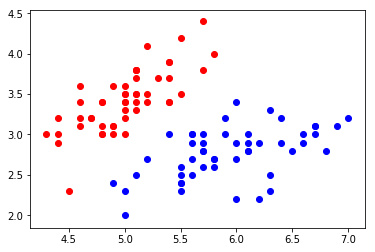

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2, :2]
y = y[y<2]

plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y)

# 实现Bayes 分类器

In [6]:
class BayesClassifier():
    def __init__(self):
        self.p0Vect_ = None
        self.p1Vect_ = None
        self.pAbusive_ = 0.0
 

    def fit(self, X, y):
        assert X.shape[0] == y.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        numTrain = len(X)
        numFeature = len(X[0])
        self.pAbusive_ = sum(y)/float(numTrain)
        p0Num = np.ones(numFeature); p1Num = np.ones(numFeature)      #change to ones() 
        p0Denom = 2.0; p1Denom = 2.0                        #change to 2.0
        for i in range(numTrain):
            if y[i] == 1:
                p1Num += X[i]
                p1Denom += sum(X[i])
            else:
                p0Num += X[i]
                p0Denom += sum(X[i])
        self.p1Vect_ = np.log(p1Num/p1Denom)          #change to log()
        self.p0Vect_ = np.log(p0Num/p0Denom)          #change to log()

        return self

    def _predict(self, x):
#         assert len(x) != len(self.p1Vect_), \
#             "the feature number of x must be equal to X_train"
        p1 = sum(x * self.p1Vect_) + np.log(self.pAbusive_)
        p0 = sum(x * self.p0Vect_) + np.log(1.0 - self.pAbusive_)
        
        if p1>p0:
            return 1
        else:
            return 0
    
    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.p0Vect_ is not None and self.p1Vect_ is not None, \
                "must fit before predi ct!"
        assert X_predict.shape[1] == len(self.p1Vect_), \
                "the feature number of X_predict must be equal to X_train"
        
        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)
    
    def score(self, X_predict, y_test):
        y_predict = self.predict(X_predict)
        return accuracy_score(y_predict,y_test)
        
    
    def info(self):
        print('P {}\n p0 {} \n p1{}'.format(self.pAbusive_, self.p0Vect_, self.p1Vect_) )
    
    def __repr__(self):
        return "BayesClassifier( )"



In [8]:
bayes_clf = BayesClassifier()
bayes_clf.fit(X,  y)
bayes_clf.info()
# print(bayes_clf.predict(X_test))
# print(y_test)
bayes_clf.score(X_train, y_train)

P 0.5
 p0 [-0.52237821 -0.8992083 ] 
 p1[-0.38419734 -1.14255486]


1.0

# 原理

![image](./image/001.png)

In [9]:
X = np.array([
    [42, 15], 
    [ 338, 287], 
    [ 3, 5]])

In [10]:
y_1 = np.sum(X, axis=1)
y_0 = np.sum(X, axis=0)
x_sum = np.sum(X)
print(y_0)
print(y_1)

[383 307]
[ 57 625   8]


In [11]:
x_prob = np.zeros((X.shape[0], X.shape[1]))
for i in range(len(X)):
    for j in range(len(X[0])):
        pxy = X[i][j] / y_0[j]
#         print(X[i][j], y_0[j], pxy)
        py = y_0[j] / x_sum
#         print(y_0[j], x_sum , py)
        px = y_1[i] / x_sum
#         print(y_1[i], x_sum , px)
        x_prob[i][j] = pxy * py/px
        print('i: {} j: {}  prob: {} '.format(i, j, pxy * py/px))

i: 0 j: 0  prob: 0.736842105263158 
i: 0 j: 1  prob: 0.26315789473684215 
i: 1 j: 0  prob: 0.5408 
i: 1 j: 1  prob: 0.4592 
i: 2 j: 0  prob: 0.37499999999999994 
i: 2 j: 1  prob: 0.625 


In [12]:
x_prob

array([[0.73684211, 0.26315789],
       [0.5408    , 0.4592    ],
       [0.375     , 0.625     ]])